In [1]:
# Import the necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/hussenmi/sales1/master/salaries-by-college-type.csv")  # Read the data
data.head()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,72200.0,126000.0,76800.0,99200.0,168000.0,220000.0
1,"Polytechnic University of New York, Brooklyn",Engineering,62400.0,114000.0,66800.0,94300.0,143000.0,190000.0
2,Worcester Polytechnic Institute (WPI),Engineering,61000.0,114000.0,80000.0,91200.0,137000.0,180000.0
3,Carnegie Mellon University (CMU),Engineering,61800.0,111000.0,63300.0,80100.0,150000.0,209000.0
4,Rensselaer Polytechnic Institute (RPI),Engineering,61100.0,110000.0,71600.0,85500.0,140000.0,182000.0


In [3]:
data.describe()

,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
count,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000
mean,45825.108225,82666.233766,44250.649351,59796.536797,113324.675325,157705.627706
std,6120.434189,14016.294341,8719.612427,10925.788645,21586.264690,34823.348157
min,34800.000000,43900.000000,22600.000000,31800.000000,60900.000000,87600.000000
25%,41950.000000,73050.000000,39000.000000,53000.000000,99550.000000,136000.000000
50%,44700.000000,81300.000000,43100.000000,57800.000000,111000.000000,153000.000000
75%,47650.000000,87850.000000,47400.000000,63100.000000,120500.000000,170500.000000
max,72200.000000,134000.000000,80000.000000,100000.000000,234000.000000,326000.000000


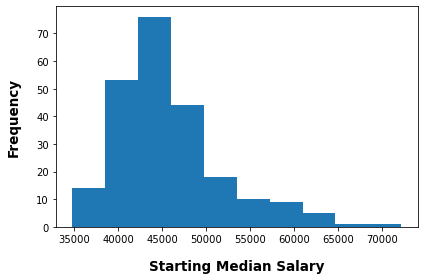

In [4]:
# Plot histogram for the starting median salary

plt.hist(data['Starting Median Salary'])
plt.ylabel('Frequency', labelpad=15, fontweight='bold', fontsize=13.5)
plt.xlabel('Starting Median Salary', labelpad=15, fontweight='bold', fontsize=13.5)
plt.tight_layout()
# plt.savefig('sms.jpg',dpi=300)
plt.show()

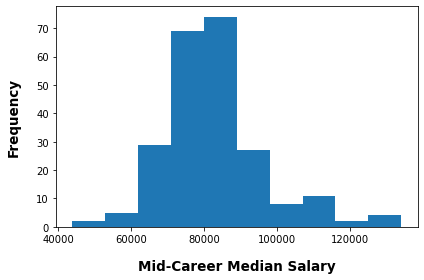

In [5]:
# Plot histogram for the mid-career median salary

plt.hist(data['Mid-Career Median Salary'])
plt.ylabel('Frequency', labelpad=15, fontweight='bold', fontsize=13.5)
plt.xlabel('Mid-Career Median Salary', labelpad=15, fontweight='bold', fontsize=13.5)
plt.tight_layout()
# plt.savefig('mcms.jpg',dpi=300)
plt.show()

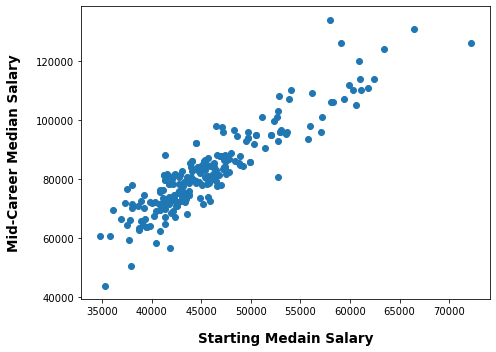

In [7]:
# Plot the scatterplot between the variables

plt.figure(figsize=(7,5))
plt.scatter(data['Starting Median Salary'],data['Mid-Career Median Salary'])
plt.ylabel('Mid-Career Median Salary', labelpad=15, fontweight='bold', fontsize=13.5)
plt.xlabel('Starting Medain Salary', labelpad=15, fontweight='bold', fontsize=13.5)
plt.tight_layout()
# plt.savefig('f1.jpg',dpi=300)
plt.show()

In [9]:
# This function was the one we used in class, so it was taken from there, but the function I wrote, which is found at the 
# bottom also does the same stuff -- calculating p,r,confidence interval,p-value 

def mult_regression(column_x, column_y):
    ''' this function uses built in library functions to construct a linear 
    regression model with potentially multiple predictor variables. It outputs 
    two plots to assess the validity of the model.'''

    # If there is only one predictor variable, plot the regression line
    if len(column_x)==1:
        plt.figure()
        sns.regplot(x=column_x[0], y=column_y, data=data, marker="+",fit_reg=True,color='orange')
    
    # define predictors X and response Y:
    X = data[column_x]
    X = statsmodels.add_constant(X)
    Y = data[column_y]
    
    # construct model:
    global regressionmodel 
    regressionmodel = statsmodels.OLS(Y,X).fit() # OLS = "ordinary least squares"

    # residual plot:
    plt.figure()
    residualplot = sns.residplot(x=regressionmodel.predict(), y=regressionmodel.resid, color='green')
    residualplot.set(xlabel='Fitted values for '+column_y, ylabel='Residuals')
    residualplot.set_title('Residuals vs Fitted values',fontweight='bold',fontsize=14)
    
    # QQ plot:
    qqplot = statsmodels.qqplot(regressionmodel.resid,fit=True,line='45')
    qqplot.suptitle("Normal Probability (\"QQ\") Plot for Residuals",fontweight='bold',fontsize=14)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Mid-Career Median Salary   R-squared:                       0.829
Model:                                  OLS   Adj. R-squared:                  0.828
Method:                       Least Squares   F-statistic:                     1108.
Date:                      Sun, 31 Jan 2021   Prob (F-statistic):           1.09e-89
Time:                              21:20:25   Log-Likelihood:                -2329.1
No. Observations:                       231   AIC:                             4662.
Df Residuals:                           229   BIC:                             4669.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -1.286e+04   2895.932     -4.442      0.000   -1.86e+04   -7158.357
Starting Median Salary     2.0847      0.063     33.280      0.000       1.961       2.208
==============================================================================
Omnibus:                       16.111   Durbin-Watson:                   1.196
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.937
Skew:                           0.255   Prob(JB):                     5.78e-09
Kurtosis:                       4.919   Cond. No.                     3.50e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

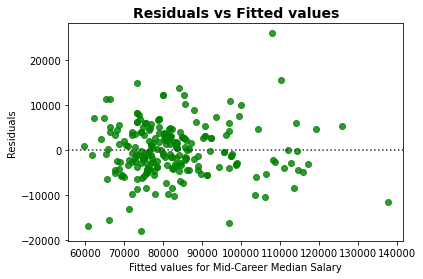

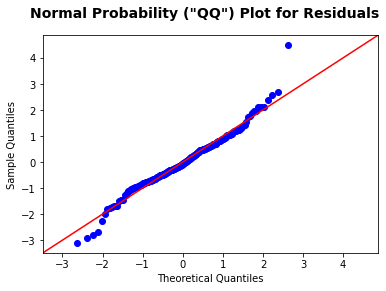

In [11]:
import statsmodels.api as statsmodels
mult_regression('Starting Median Salary','Mid-Career Median Salary')
regressionmodel.summary()

In [12]:
def regression_model(column_x, column_y):
    # this function uses built in library functions to create a scatter plot,
    # plots of the residuals, compute R-squared, and display the regression eqn

    # fit the regression line using "statsmodels" library:
    X = statsmodels.add_constant(data[column_x])
    Y = data[column_y]
    regressionmodel = statsmodels.OLS(Y,X).fit() #OLS stands for "ordinary least squares"

    # extract regression parameters from model, rounded to 3 decimal places:
    Rsquared = round(regressionmodel.rsquared,3)
    slope = round(regressionmodel.params[1],3)
    intercept = round(regressionmodel.params[0],3)

    # make plots:
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(12,4))
    sns.regplot(x=column_x, y=column_y, data=data, marker="+", ax=ax1) # scatter plot
    sns.residplot(x=column_x, y=column_y, data=data, ax=ax2) # residual plot
    ax2.set(ylabel='Residuals')
    ax2.set_ylim(min(regressionmodel.resid)-1,max(regressionmodel.resid)+1)
    plt.figure() # histogram
    sns.distplot(regressionmodel.resid, kde=False, axlabel='Residuals', color='red') # histogram

    # print the results:
    print("R-squared = ",Rsquared)
    print("Regression equation: "+column_y+" = ",slope,"* "+column_x+" + ",intercept)

R-squared =  0.829
Regression equation: Mid-Career Median Salary =  2.085 * Starting Median Salary +  -12864.435


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Mid-Career Median Salary   R-squared:                       0.829
Model:                                  OLS   Adj. R-squared:                  0.828
Method:                       Least Squares   F-statistic:                     1108.
Date:                      Sun, 31 Jan 2021   Prob (F-statistic):           1.09e-89
Time:                              21:20:50   Log-Likelihood:                -2329.1
No. Observations:                       231   AIC:                             4662.
Df Residuals:                           229   BIC:                             4669.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -1.286e+04   2895.932     -4.442      0.000   -1.86e+04   -7158.357
Starting Median Salary     2.0847      0.063     33.280      0.000       1.961       2.208
==============================================================================
Omnibus:                       16.111   Durbin-Watson:                   1.196
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.937
Skew:                           0.255   Prob(JB):                     5.78e-09
Kurtosis:                       4.919   Cond. No.                     3.50e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

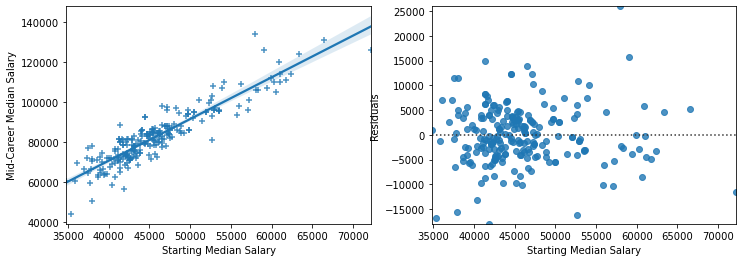

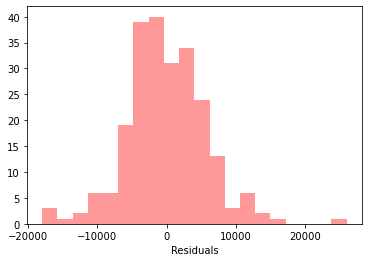

In [14]:
regression_model('Starting Median Salary','Mid-Career Median Salary')
regressionmodel.summary()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


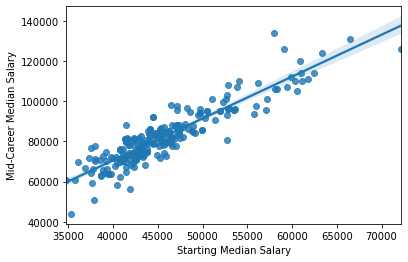

Regression model: y = 2.085x + -12879.117
Confidence interval: 2.085 ± 1.97*0.063 = [1.96089,2.20911]
We reject the null hypothesis! p_value = 5.465092860471596e-90


In [17]:
# Defining my own function that gives a scatterplot with the best fit line, equation of the regression equation, the 
# confidence interval, and tell us if we should reject our null hypothesis by also giving us the p-value
def reg(x,y):   
    n = len(data)
    r,p = stats.pearsonr(x,y)  # Use stats.pearsonr to get r and p
    x_me,y_me = np.mean(x),np.mean(y)  # Calculate the mean for x and y
    sx,sy = np.std(x,ddof=n-1),np.std(y,ddof=n-1)  # Calculate the std for x and y
    m = round(sy/sx*r,3)  # Calculate the slope
    b = round(y_me-x_me*m,3)  # Calculate the y-intercept
    SE = round((sy/sx) * ((1-r**2)/(n-2))**0.5,3)  # Calculate the standard error
    df = n-2  # Degree of freedom is n-2 because we estimate 2 things -- slope and y-intercept
    t_crt = round(stats.t.ppf(0.975,df),3)  # Calculate the t-critical value for a 95% confidence interval
    c_int = m-t_crt*SE,m+t_crt*SE  # Calculate the confidence interval
    t_val = (m-0)/SE  # Calculate the t-value
    p_value = 1-stats.t.cdf(t_val,df)  # Calculate the p-value; we subtract from 1 so we can compare it with sig level
    sig_level = 0.05
    
    sns.regplot(x,y,data=data)  # Plot the data with the best fit line which also shows the confidence interval 
    plt.show()
    print(f"Regression model: y = {m}x + {b}")
    print(f"Confidence interval: {m} ± {t_crt}*{SE} = [{m-t_crt*SE},{m+t_crt*SE}]")
    if p_value < sig_level:
        print(f"We reject the null hypothesis! p_value = {p/2}")  # We use p/2 because it is one-tailed test
    else:
        print(f"We fail to reject the null hypothesis! p_value = {p/2}")
    
reg(data['Starting Median Salary'],data['Mid-Career Median Salary'])